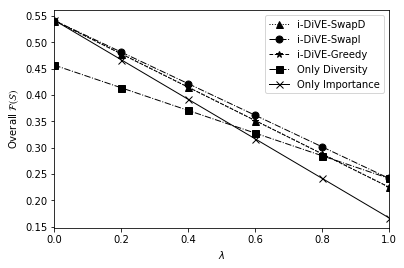

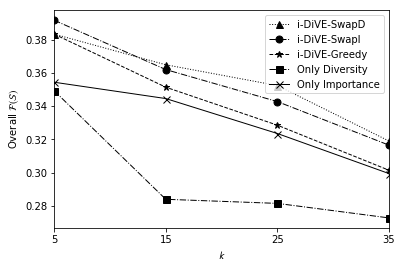

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "march_objf_flights.csv"
output_plot_objf = "objf_flights.svg"
output_plot_tradeoff = "tradeoff_flights.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']

df = df.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df = df[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})

# writer = pd.ExcelWriter('tradeoff_flights.xlsx')
# df.to_excel(writer,'Sheet1', index=1)
# writer.save()

ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()



df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df_objf = df_objf[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']


ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.savefig(output_plot_objf, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

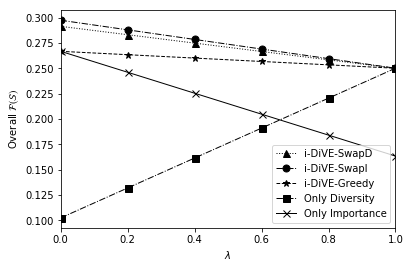

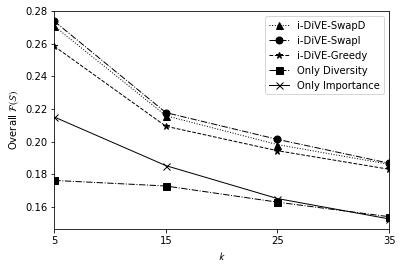

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "march_objf_heart.csv"
output_plot_objf = "objf_heart.svg"
output_plot_tradeoff = "tradeoff_heart.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']
df = df.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df = df[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df_objf = df_objf[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']


ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.savefig(output_plot_objf, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

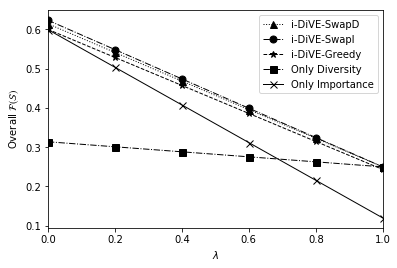

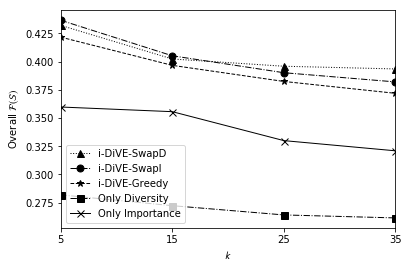

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "march_objf_superstore.csv"
output_plot_objf = "objf_superstore.svg"
output_plot_tradeoff = "tradeoff_superstore.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

#https://matplotlib.org/examples/color/named_colors.html
#my_color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#my_color = ['maroon', 'purple', 'red', 'green', 'sandybrown', 'dodgerblue']

my_color = ['black', 'black', 'black', 'black', 'black', 'black']


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']
df = df.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df = df[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df = df.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


ax = df.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df.columns, loc='best')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
#plt.xticks([0.2,0.4,0.6,0.8])
plt.savefig(output_plot_tradeoff, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

df_objf = df_all_objf.copy()
df_objf['util'] = df_objf['util']*0.5
df_objf['div'] = df_objf['div']*0.5
df_objf['objf_value'] = df_objf['util'] + df_objf['div']
df_objf =df_objf.drop(['util','div','objf','time'],axis =1)
df_objf = df_objf.pivot(index='k', columns='algo')
df_objf = df_objf['objf_value']
#df_objf = df_objf[['Random','SeeDB','Greedy','SwapU','SwapD','pGreedyPruning','SwapDPruning']]

df_objf = df_objf.rename(columns={'i-DiVE Greedy':'i-DiVE-Greedy', 'Only Interestingness':'Only Importance'})
df_objf = df_objf[['i-DiVE-SwapD','i-DiVE-SwapI','i-DiVE-Greedy','Only Diversity','Only Importance']]
#df_objf = df_objf.rename(columns={'SBI':'Only Interestingness','SBD':'Only Diversity','SBID-Greedy':'iDiVE-Greedy', 'SBID-SwapI':'iDiVE-SwapI', 'SBID-SwapD':'iDiVE-SwapD'})


markers = ['^','o','*','s','x']
linestyles = [':','-.','--','-.','-']


ax = df_objf.plot(kind='line', markersize=7, linewidth=1, color=my_color)
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])

for i, line in enumerate(ax.get_lines()):
    line.set_linestyle(linestyles[i])

# for adding legend
ax.legend(ax.get_lines(), df_objf.columns, loc='best')
plt.xlabel(r'$\mathcal{k}$', fontsize=10)
plt.ylabel(r'Overall $\mathcal{F(S)}$', fontsize=10)
plt.xticks([5,15,25,35])
plt.savefig(output_plot_objf, format="svg", dpi = 1000)
#ax.set_ylim(ymin=0)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


input_file = "march_objf_superstore.csv"
output_plot_objf = "objf_superstore.svg"
output_plot_tradeoff = "tradeoff_superstore.svg"


column_names = ['algo','k','util','div','objf','time']
df_all_objf = pd.read_csv(input_file, header=None, names = column_names)
df_all_tradeoff = pd.read_csv(input_file, header=None, names = column_names)

def calculate_tradeoff(util,div,tradeoff):
    total = ((1-tradeoff)*util) + (tradeoff*div)
    return total

df_tradeoff = df_all_tradeoff[df_all_tradeoff['k']==5]
df_tradeoff = df_tradeoff.drop(['k','objf','time'],axis=1)
df_tradeoff['0.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.0)
df_tradeoff['0.2'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.2)
df_tradeoff['0.4'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.4)
df_tradeoff['0.6'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.6)
df_tradeoff['0.8'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],0.8)
df_tradeoff['1.0'] = calculate_tradeoff(df_tradeoff['util'], df_tradeoff['div'],1.0)
df_tradeoff = df_tradeoff.drop(['util','div'], axis=1)
df_tradeoff.set_index('algo',inplace=True)
df_tradeoff = df_tradeoff.transpose()
df = df_tradeoff

df

algo,Random,Only Interestingness,Only Diversity,i-DiVE Greedy,i-DiVE-SwapI,i-DiVE-SwapD
0.0,0.295761,0.599504,0.313882,0.600005,0.623240,0.614195
0.2,0.281108,0.503603,0.301106,0.528671,0.548592,0.541356
0.4,0.266456,0.407703,0.288329,0.457336,0.473944,0.468517
0.6,0.251804,0.311802,0.275553,0.386002,0.399296,0.395678
0.8,0.237152,0.215901,0.262776,0.314668,0.324648,0.322839
1.0,0.222500,0.120000,0.250000,0.243333,0.250000,0.250000
